## Project conducted by R.P.M. Kras
### Personal development project

Predicting future of Solana

Source: "SOL-USD", yahoofinance.com

In [119]:
import yfinance as yf

In [120]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [121]:
stock = "SOL-USD"
sol_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


### Data visualization and preparation

In [122]:
sol_data.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-04-10    0.832005    1.313487    0.694187    0.951054    0.951054   
2020-04-11    0.951054    1.049073    0.765020    0.776819    0.776819   
2020-04-12    0.785448    0.956670    0.762426    0.882507    0.882507   
2020-04-13    0.890760    0.891603    0.773976    0.777832    0.777832   
2020-04-14    0.777832    0.796472    0.628169    0.661925    0.661925   
...                ...         ...         ...         ...         ...   
2024-04-24  154.701309  159.580902  145.770569  147.745148  147.745148   
2024-04-25  147.749619  149.303757  142.264572  144.892120  144.892120   
2024-04-26  144.889175  145.854614  138.908386  139.104340  139.104340   
2024-04-27  139.104340  142.874512  134.028915  141.289169  141.289169   
2024-04-28  141.298676  144.477203  141.039108  142.152893  142.152893   

       

In [123]:
sol_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2020-04-10 to 2024-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1480 non-null   float64
 1   High       1480 non-null   float64
 2   Low        1480 non-null   float64
 3   Close      1480 non-null   float64
 4   Adj Close  1480 non-null   float64
 5   Volume     1480 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.9 KB


In [124]:
sol_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Solana")

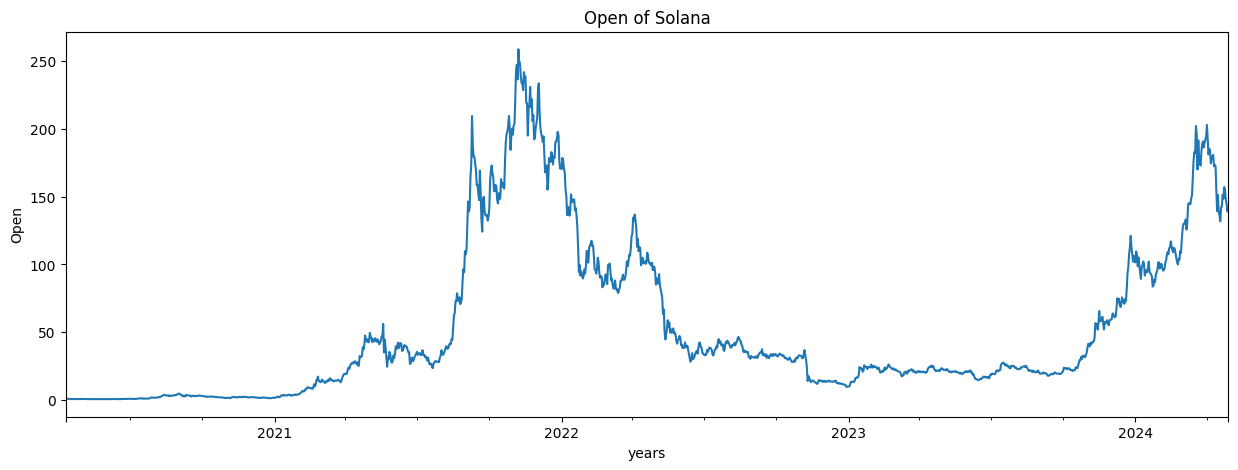

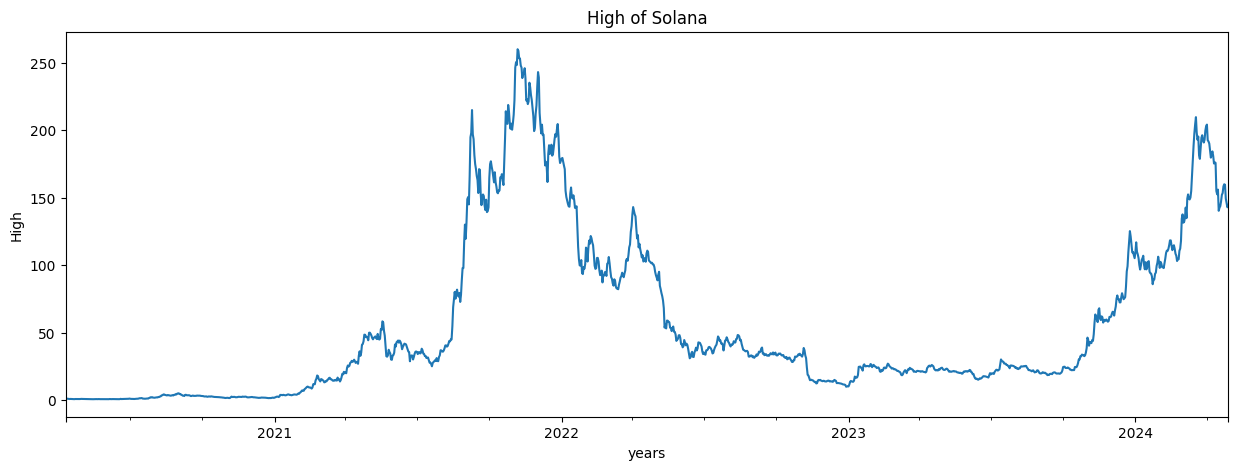

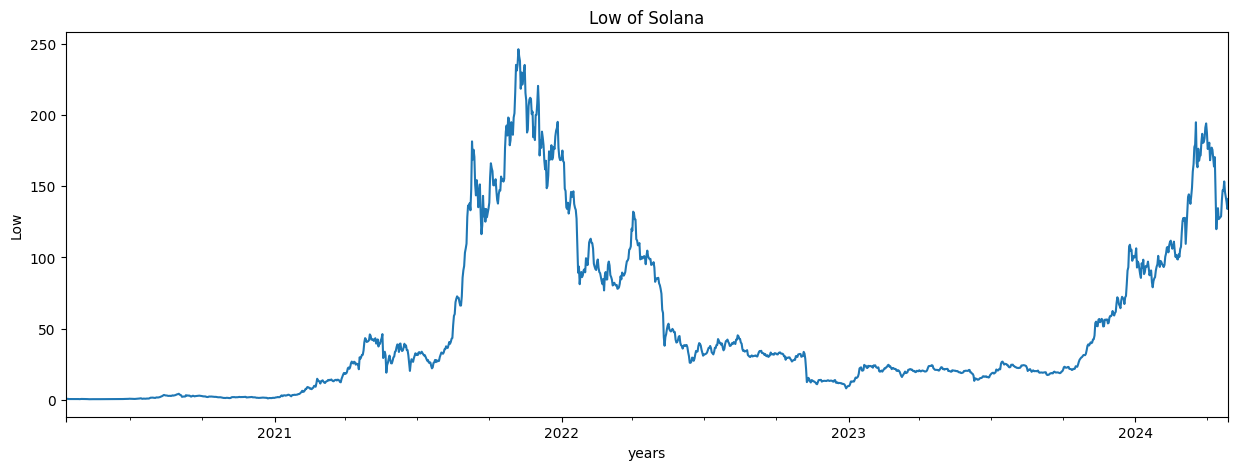

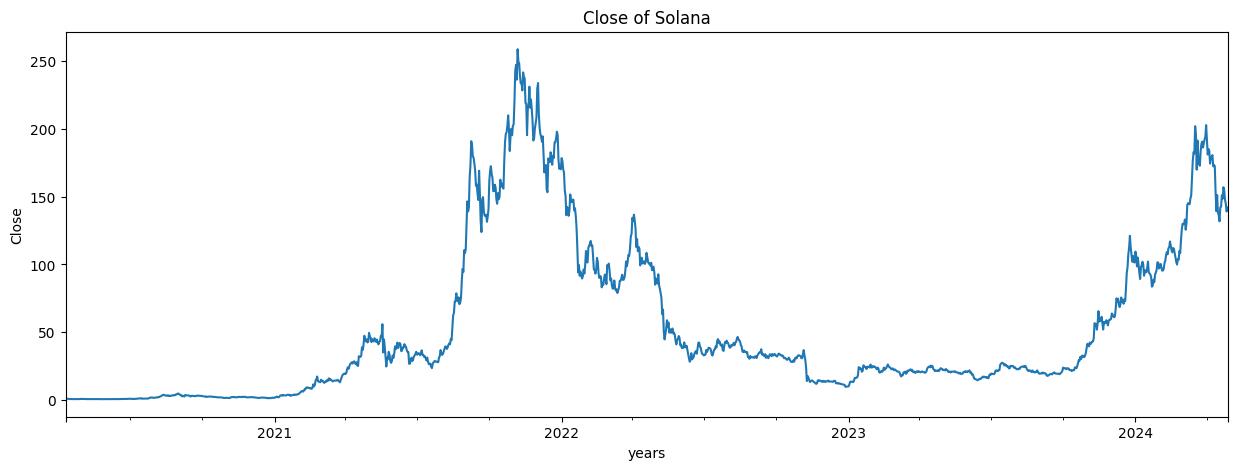

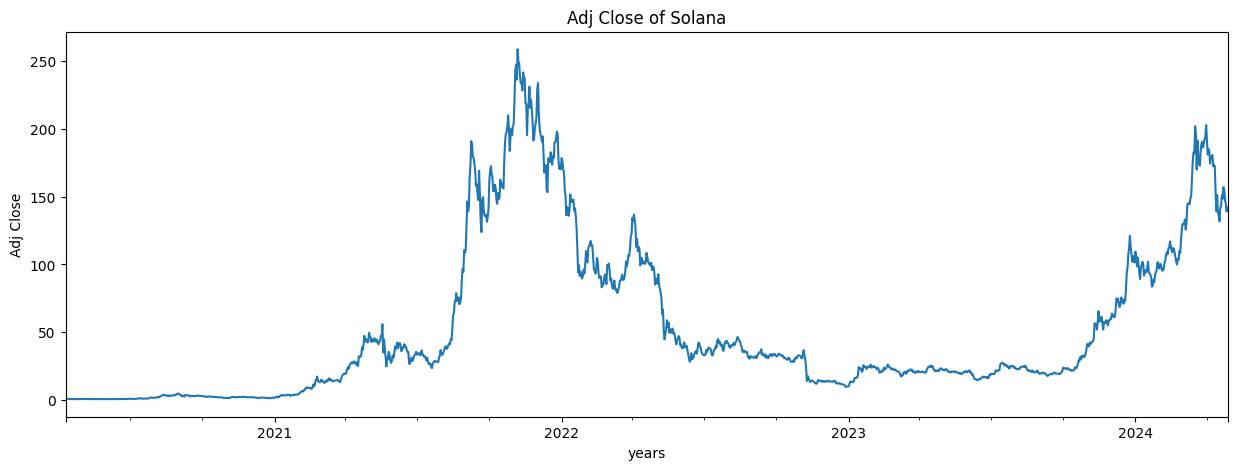

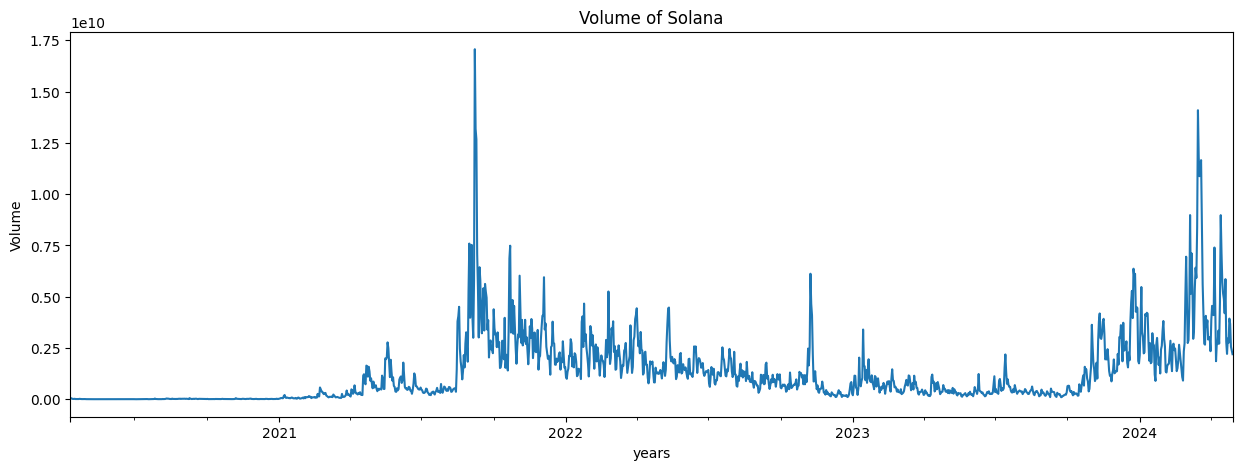

In [127]:
for column in sol_data.columns:
    plot_graph((15,5),sol_data[column], column)

In [128]:
import pandas as pd

for i in range(2020,2025):
    print(list(sol_data.index.year).count(i))

266
365
365
365
119


In [129]:
sol_data['MA_for_100_days'] = sol_data['Adj Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

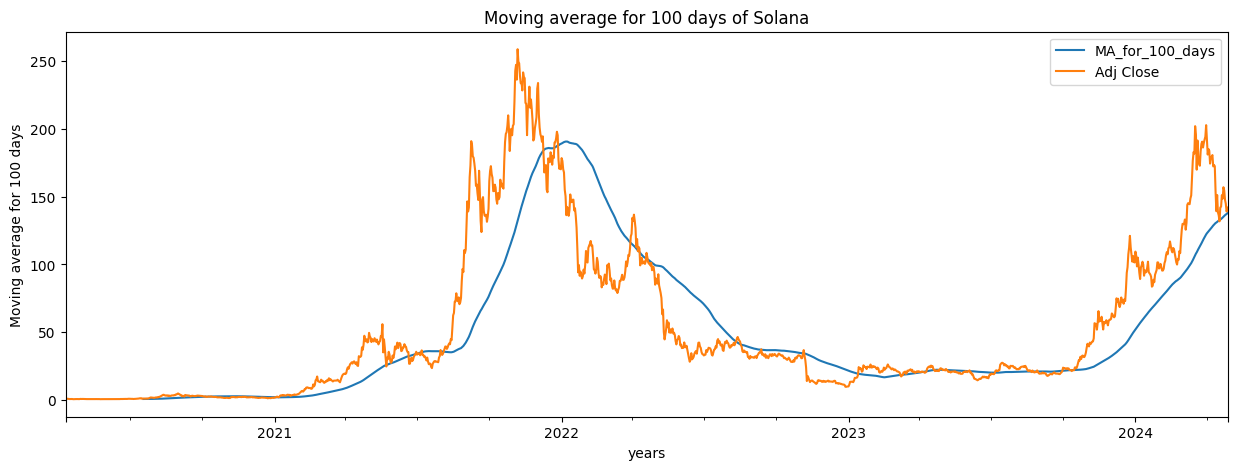

In [130]:
plot_graph((15,5), sol_data[['MA_for_100_days', 'Adj Close']], 'Moving average for 100 days')

In [131]:
adj_close = sol_data[['Adj Close']]
print("Highest recorded adj closing price: "f"{max(adj_close.values)}")
print("Lowest recorded adj closing price: "f"{min(adj_close.values)}")

Highest recorded adj closing price: [258.93432617]
Lowest recorded adj closing price: [0.51527297]


In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.00168633],
       [0.0010121 ],
       [0.00142108],
       ...,
       [0.53629585],
       [0.54475045],
       [0.54809279]])

In [133]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [134]:
int(len(x_data)*0.7)

965

In [135]:
1408-100-int(len(x_data)*0.8)

204

In [136]:
split_len = int(len(x_data)*0.8)
x_train = x_data[:split_len]
y_train = y_data[:split_len]

x_test = x_data[split_len:]
y_test = y_data[split_len:]

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1104, 100, 1)
(1104, 1)
(276, 100, 1)
(276, 1)


In [138]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [139]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\robkr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [140]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [141]:
model.fit(x_train, y_train, batch_size=8, epochs=4)

Epoch 1/4


138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0090
Epoch 2/4
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0019
Epoch 3/4
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0018
Epoch 4/4
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.4713e-04


In [142]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [143]:
predictions = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [144]:
predictions

array([[0.09993885],
       [0.10074915],
       [0.10179126],
       [0.10218569],
       [0.10180355],
       [0.10124521],
       [0.1001287 ],
       [0.09856952],
       [0.09714527],
       [0.09594062],
       [0.0954311 ],
       [0.09531749],
       [0.09618887],
       [0.09755659],
       [0.09910741],
       [0.10046104],
       [0.10167401],
       [0.10215315],
       [0.10272955],
       [0.10243303],
       [0.1009967 ],
       [0.09846774],
       [0.09554441],
       [0.09327876],
       [0.09170972],
       [0.09043878],
       [0.08913165],
       [0.08879283],
       [0.0886149 ],
       [0.0881428 ],
       [0.08751901],
       [0.08724932],
       [0.08707053],
       [0.08776516],
       [0.08819943],
       [0.08769271],
       [0.08648698],
       [0.08521186],
       [0.08417456],
       [0.08339664],
       [0.08339762],
       [0.08340359],
       [0.08358461],
       [0.08363953],
       [0.08351392],
       [0.08253247],
       [0.08091979],
       [0.079

In [145]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 26.341375],
       [ 26.550774],
       [ 26.820074],
       [ 26.922003],
       [ 26.82325 ],
       [ 26.678965],
       [ 26.390436],
       [ 25.987516],
       [ 25.619463],
       [ 25.308159],
       [ 25.176489],
       [ 25.14713 ],
       [ 25.372309],
       [ 25.725756],
       [ 26.126516],
       [ 26.47632 ],
       [ 26.789776],
       [ 26.913595],
       [ 27.062548],
       [ 26.985922],
       [ 26.614744],
       [ 25.961214],
       [ 25.20577 ],
       [ 24.620283],
       [ 24.214813],
       [ 23.88638 ],
       [ 23.548592],
       [ 23.461033],
       [ 23.415052],
       [ 23.293055],
       [ 23.131855],
       [ 23.062162],
       [ 23.015959],
       [ 23.195465],
       [ 23.307688],
       [ 23.17674 ],
       [ 22.865158],
       [ 22.53564 ],
       [ 22.267584],
       [ 22.066555],
       [ 22.066807],
       [ 22.068352],
       [ 22.11513 ],
       [ 22.129322],
       [ 22.096863],
       [ 21.843237],
       [ 21.426489],
       [ 21.0

In [146]:
inv_y_test = scaler.inverse_transform(predictions)
inv_y_test

array([[ 26.341375],
       [ 26.550774],
       [ 26.820074],
       [ 26.922003],
       [ 26.82325 ],
       [ 26.678965],
       [ 26.390436],
       [ 25.987516],
       [ 25.619463],
       [ 25.308159],
       [ 25.176489],
       [ 25.14713 ],
       [ 25.372309],
       [ 25.725756],
       [ 26.126516],
       [ 26.47632 ],
       [ 26.789776],
       [ 26.913595],
       [ 27.062548],
       [ 26.985922],
       [ 26.614744],
       [ 25.961214],
       [ 25.20577 ],
       [ 24.620283],
       [ 24.214813],
       [ 23.88638 ],
       [ 23.548592],
       [ 23.461033],
       [ 23.415052],
       [ 23.293055],
       [ 23.131855],
       [ 23.062162],
       [ 23.015959],
       [ 23.195465],
       [ 23.307688],
       [ 23.17674 ],
       [ 22.865158],
       [ 22.53564 ],
       [ 22.267584],
       [ 22.066555],
       [ 22.066807],
       [ 22.068352],
       [ 22.11513 ],
       [ 22.129322],
       [ 22.096863],
       [ 21.843237],
       [ 21.426489],
       [ 21.0

In [147]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [148]:
rmse

0.0

In [152]:
plotting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)  
}, index=sol_data.index[split_len+100:])

<Figure size 640x480 with 0 Axes>

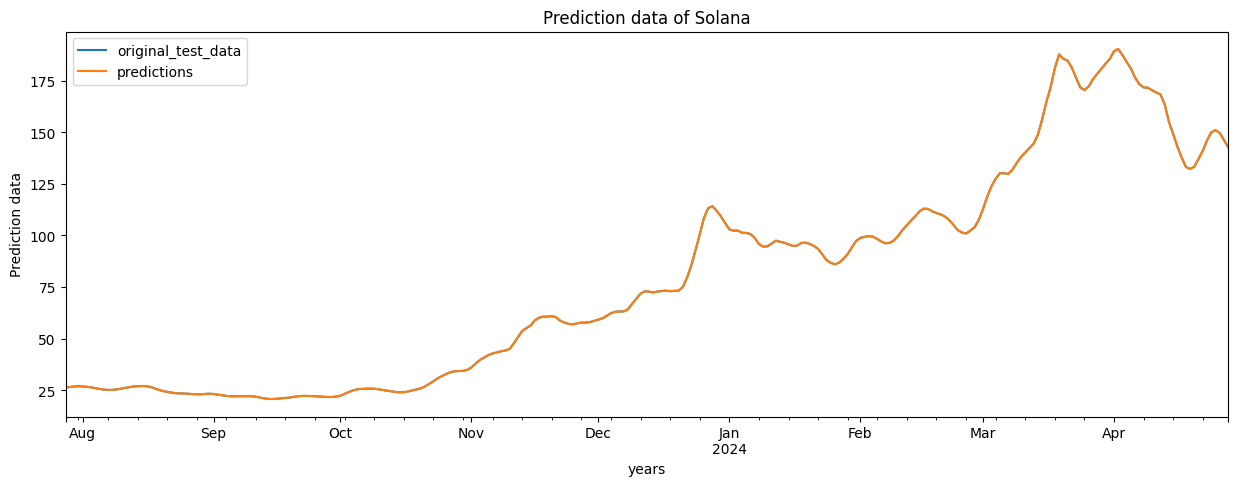

In [157]:
plot_graph((15,5), plotting_data, 'Prediction data')

<Figure size 640x480 with 0 Axes>

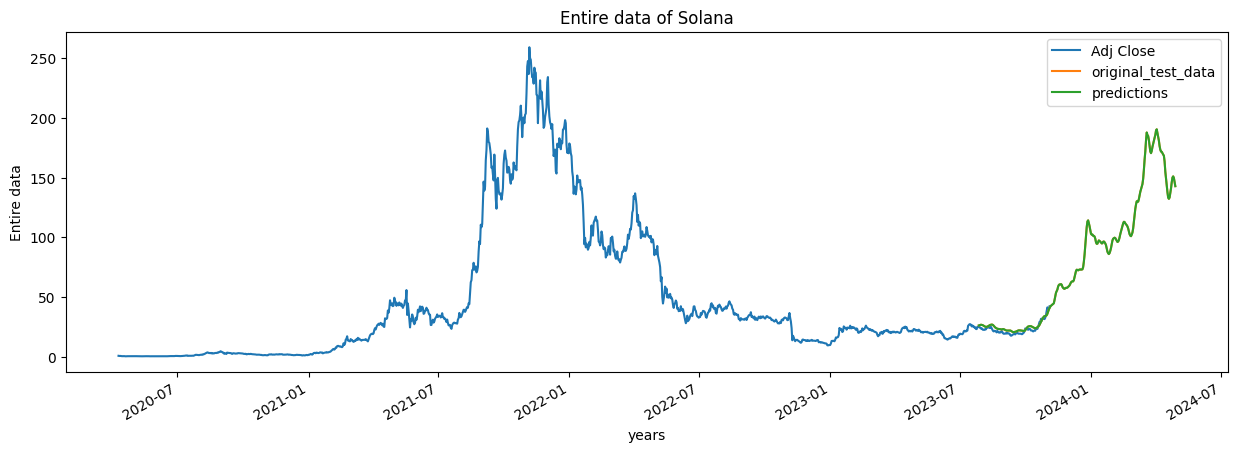

In [160]:
plot_graph((15,5), pd.concat([adj_close[:split_len+200], plotting_data], axis=0), 'Entire data')

In [ ]:
model.save("solana_predictive_model.keras")